# More charts for Achievement 4

#### Import libraries

#### Import data

#### Regional charts

#### Export charts into visualizations folder

## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import data

In [2]:
# Set Path
path = r'/Users/mainframe/Documents/Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_final_data.pkl'))

## Regional charts

In [4]:
# Create crosstab to compare departments with regions
dept_region_cross = pd.crosstab(df['department'], df['region'], dropna = False)

In [5]:
dept_region_cross

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [6]:
# Convert raw numbers to percentages by region
dept_region_cross_pct = dept_region_cross.div(dept_region_cross.sum(axis = 0), axis = 1) * 100

In [7]:
dept_region_cross_pct

region,Midwest,Northeast,South,West
department,,,,
alcohol,0.468814,0.457794,0.473401,0.463643
babies,1.318472,1.330580,1.353013,1.292104
bakery,3.604662,3.647054,3.604064,3.635004
beverages,8.248680,8.471284,8.334860,8.206829
breakfast,2.150447,2.157563,2.164378,2.190161
bulk,0.109192,0.102458,0.108426,0.110291
canned goods,3.270104,3.237808,3.272752,3.282623
dairy eggs,16.697484,16.736848,16.710239,16.740532
deli,3.228859,3.264561,3.235530,3.246432


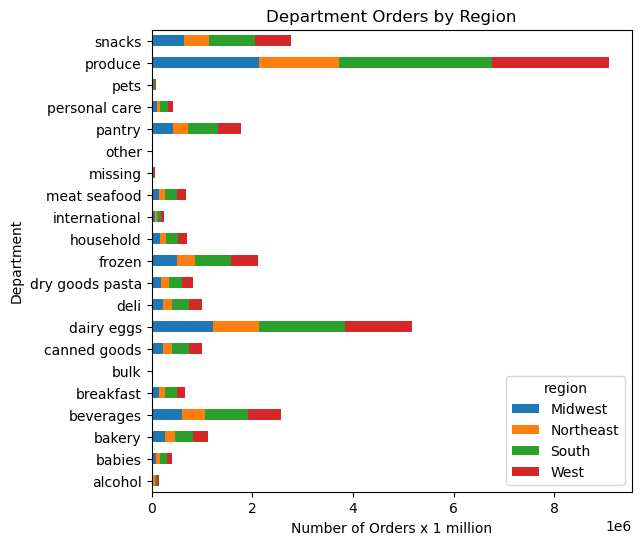

In [8]:
# Create bar chart that shows department orders by region
fig, ax = plt.subplots(figsize = (8, 6))
fig.subplots_adjust(left = 0.3) # Adjust left margin to provide more space for labels
# Plot using the axis created
dept_region_bar = dept_region_cross.plot(kind = 'barh', stacked = True, ax = ax)
ax.set_title('Department Orders by Region')
ax.set_xlabel('Number of Orders x 1 million')
ax.set_ylabel('Department')
# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

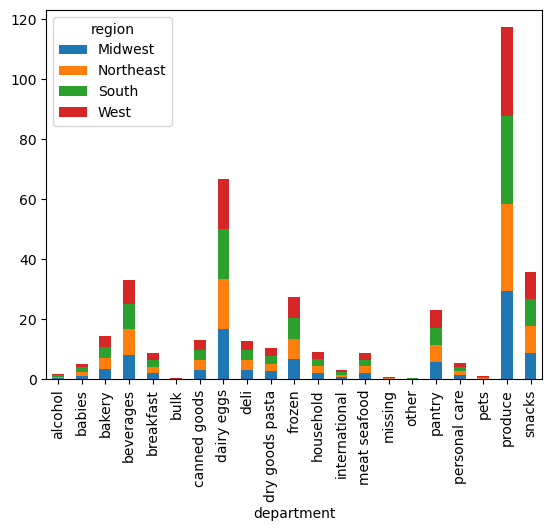

In [9]:
# Create bar char that shows percentages of department orders by region
plt.figure(figsize = (10,6))
plt.subplots_adjust(left = 0.3)
drp_bar = dept_region_cross_pct.plot(kind = 'bar', stacked = True)

In [10]:
# Filter for 'beverages' within 'department'
bevs = df[df['department'] == 'beverages']

In [11]:
# Create crosstab of 'beverages' by 'region'
bevs_reg_cross = pd.crosstab(bevs['department'], bevs['region'])

In [12]:
bevs_reg_cross

region,Midwest,Northeast,South,West
department,,,,
beverages,598979,462929,859419,650574


Text(0, 0.5, '')

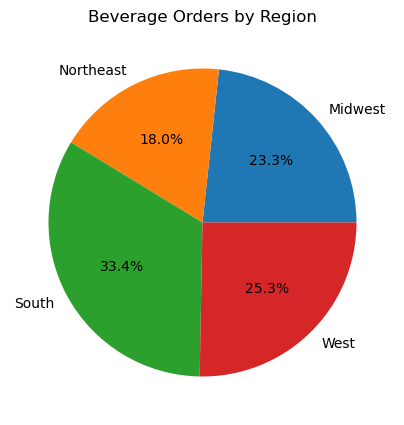

In [13]:
# Create pie chart of beverages orders by region
bevs_reg_pie = bevs_reg_cross.T.plot.pie(subplots = True, autopct = '%1.1f%%', legend = False, figsize = (5, 5))
plt.title('Beverage Orders by Region')
plt.ylabel('')

In [14]:
# Create crosstab to compare 'age_group' with 'marital'
age_marital_cross = pd.crosstab(df['age_group'], df['marital'], dropna = False)

In [15]:
age_marital_cross

marital,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Baby Boomer,2270171,0,6817399,0
Gen X,0,0,5857564,1947984
Gen Z,0,1481172,2161199,1213110
Millenial,0,0,5795715,1933316
Silent Gen,375100,0,1111834,0


###### Astounding numbers - There are zero members of Gen X, Gen Z, and Millenial generations who use IC if they have been divorced/widowed. And zero single members of the Baby Boomer and Silent Generations who use IC. The vast majority of IC's users are married. 

In [16]:
# Check value counts of 'marital' variable
df['marital'].value_counts()

marital
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

Text(0, 0.5, '')

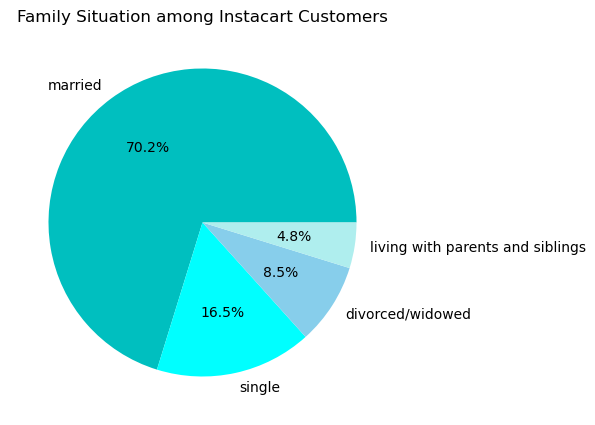

In [17]:
# Create pie chart of 'marital'
plt.figure(figsize = (8, 5))
plt.title('Family Situation among Instacart Customers')
marital_pie = df['marital'].value_counts().plot.pie(autopct = ('%1.1f%%'), colors = ['c', 'aqua', 'skyblue', 'paleturquoise'])
plt.ylabel('')

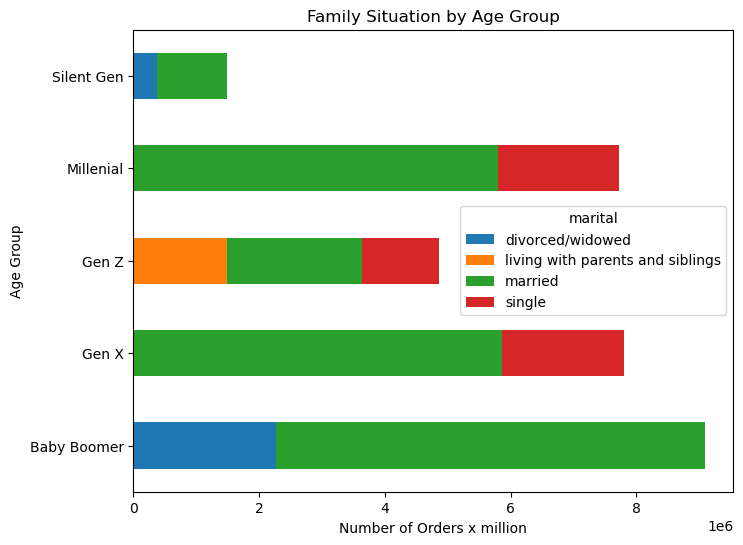

In [21]:
# Create bar chart of family situation by age group
fig1, ax1 = plt.subplots(figsize = (10,6))
plt.subplots_adjust(left = 0.3) # Adjust left margin to provide more space for labels
# Plot using the axis created
age_marital_bar = age_marital_cross.plot(kind = 'barh', stacked = True, ax = ax1)
ax1.set_title('Family Situation by Age Group')
ax1.set_ylabel('Age Group')
ax1.set_xlabel('Number of Orders x million')
plt.show()

## Export charts into visualizations folder

In [19]:
# Convert chart into exportable format
fig = bevs_reg_pie[0].get_figure()

In [22]:
# Export charts
dept_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_region_bar.png'))
drp_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_region_pct_bar.png'))
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bevs_reg_pie.png'))
marital_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_pie.png'))
age_marital_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_marital_bar.png'))